In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

In [20]:
retina_df = pd.read_csv("../Data/trainLabels.csv")
retina_df.head(5)

,image,level
0,10_left,0
1,10_right,0
2,13_left,0
3,13_right,0
4,15_left,1


In [22]:
etiquetas_tipo = ['NO DR', 'MILD', 'MODERATE', 'SEVERE', 'PROLIFERATIVE DR']
retina_df['multi_type'] = retina_df['level'].map({
    0: 'NO DR',
    1: 'MILD',
    2: 'MODERATE',
    3: 'SEVERE',
    4: 'PROLIFERATIVE DR'
})


retina_df['multi_level'] = retina_df['level']
retina_df.sample(5)

,image,level,multi_type,multi_level
4239,5318_right,0,NO DR,0
8355,10464_right,0,NO DR,0
20066,25311_left,0,NO DR,0
15638,19573_left,0,NO DR,0
8124,10181_left,2,MODERATE,2


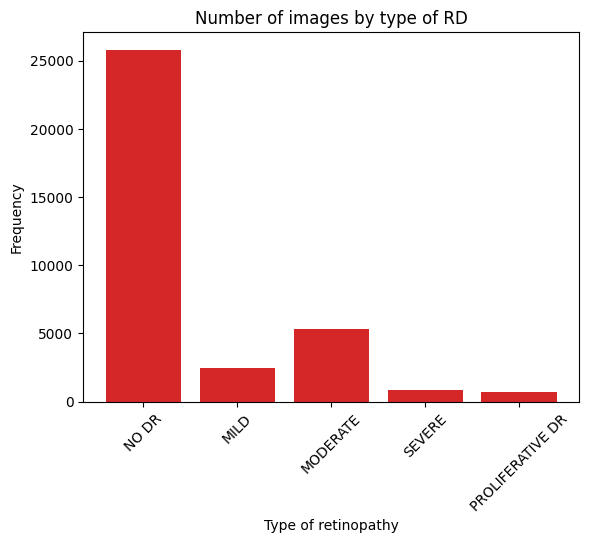

In [23]:
counts = retina_df['multi_type'].value_counts().reindex(etiquetas_tipo)
plt.bar(counts.index, counts.values, color='tab:red')
plt.title("Number of images by type of RD")
plt.xticks(rotation=45)
plt.xlabel("Type of retinopathy")
plt.ylabel("Frequency")
plt.show()

In [24]:
min_clases = counts.min()
clase = counts.idxmin()
print(f"La clase con menos imágenes es '{clase}' con {min_clases} imágenes.")

La clase con menos imágenes es 'PROLIFERATIVE DR' con 708 imágenes.


In [25]:
retina_df_bal = retina_df.groupby(['multi_type'])[['image','level','multi_type','multi_level']].apply(lambda x: x.sample(700, replace=False, random_state=42)).reset_index(drop=True)
retina_df_bal = retina_df_bal.sample(frac=1, random_state=42).reset_index(drop=True)

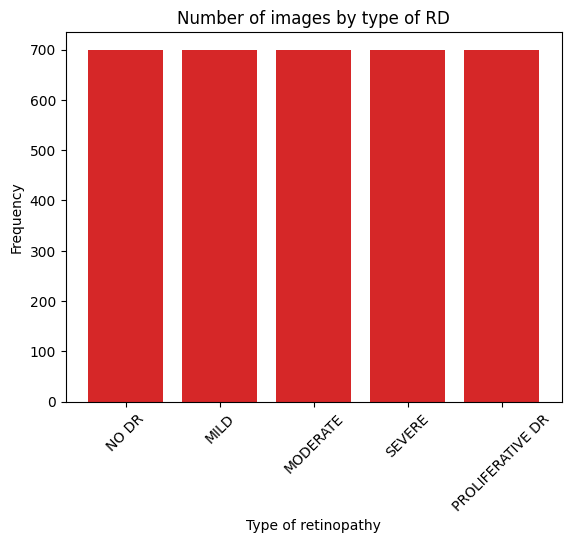

In [26]:
counts = retina_df_bal['multi_type'].value_counts().reindex(etiquetas_tipo)
plt.bar(counts.index, counts.values, color='tab:red')
plt.title("Number of images by type of RD")
plt.xticks(rotation=45)
plt.xlabel("Type of retinopathy")
plt.ylabel("Frequency")
plt.show()

In [27]:
counts

multi_type
NO DR               700
MILD                700
MODERATE            700
SEVERE              700
PROLIFERATIVE DR    700
Name: count, dtype: int64

In [28]:
retina_df_bal.to_csv('../Data/Retina_DF_BalType_Multi_700_FiveClass.csv', index=False)